# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
analyzer = SentimentIntensityAnalyzer()
load_dotenv()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\colin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\colin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\colin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\colin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin = newsapi.get_everything(q="bitcoin", language="en")
bitcoin['articles']

[{'source': {'id': 'wired', 'name': 'Wired'},
  'author': 'Timothy B. Lee, Ars Technica',
  'title': 'An Engineer Gets 9 Years for Stealing $10M From Microsoft',
  'description': 'The defendant tried—and failed—to use bitcoin to cover his tracks.',
  'url': 'https://www.wired.com/story/an-engineer-gets-9-years-for-stealing-dollar10m-from-microsoft/',
  'urlToImage': 'https://media.wired.com/photos/5fac6afb446b4639b3d5b8d8/191:100/w_1280,c_limit/Security-Microsoft-1229426260.jpg',
  'publishedAt': '2020-11-12T14:00:00Z',
  'content': "A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online store. From 2016 to 2018, Volod… [+3307 chars]"},
 {'source': {'id': None, 'name': 'Lifehacker.com'},
  'author': 'Mike Winters on Two Cents, shared by Mike Winters to Lifehacker',
  'title': 'Is the New Visa Bitcoin Rewards Card Worth It?',
  'description': 'Visa\xa0has partnered with crypt

In [5]:
# Fetch the Ethereum news articles
ethereum = newsapi.get_everything(q="ethereum",language="en")
ethereum

{'status': 'ok',
 'totalResults': 1285,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Karissa Bell',
   'title': 'PayPal now lets all US users buy, sell and hold cryptocurrency',
   'description': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only available to a small subset of PayPal account holders. That’s…',
   'url': 'https://www.engadget.com/paypal-opens-cryptocurrency-all-us-accounts-210541778.html',
   'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2020-11%2F4e1af080-2528-11eb-bbdf-193e571d142a&client=amp-blogside-v2&signature=22ad23dde6ee3e667a8067a4c39e1962659cec92',
   'publishedAt': '2020-11-12T21:05:41Z',
   'content': 'PayPal is bringing its newly-announced support for cryptoc

In [6]:
# Print total articles
print(f"Total articles about bitcoin: {bitcoin['totalResults']}")

# Show sample article
bitcoin["articles"][0]

Total articles about bitcoin: 4679


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Timothy B. Lee, Ars Technica',
 'title': 'An Engineer Gets 9 Years for Stealing $10M From Microsoft',
 'description': 'The defendant tried—and failed—to use bitcoin to cover his tracks.',
 'url': 'https://www.wired.com/story/an-engineer-gets-9-years-for-stealing-dollar10m-from-microsoft/',
 'urlToImage': 'https://media.wired.com/photos/5fac6afb446b4639b3d5b8d8/191:100/w_1280,c_limit/Security-Microsoft-1229426260.jpg',
 'publishedAt': '2020-11-12T14:00:00Z',
 'content': "A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online store. From 2016 to 2018, Volod… [+3307 chars]"}

In [7]:
# Print total articles
print(f"Total articles about ethereum: {ethereum['totalResults']}")

# Show sample article
ethereum["articles"][0]

Total articles about ethereum: 1285


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Karissa Bell',
 'title': 'PayPal now lets all US users buy, sell and hold cryptocurrency',
 'description': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only available to a small subset of PayPal account holders. That’s…',
 'url': 'https://www.engadget.com/paypal-opens-cryptocurrency-all-us-accounts-210541778.html',
 'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2020-11%2F4e1af080-2528-11eb-bbdf-193e571d142a&client=amp-blogside-v2&signature=22ad23dde6ee3e667a8067a4c39e1962659cec92',
 'publishedAt': '2020-11-12T21:05:41Z',
 'content': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptoc

In [8]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df = pd.DataFrame.from_dict(bitcoin["articles"] )
bitcoin_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'wired', 'name': 'Wired'}","Timothy B. Lee, Ars Technica",An Engineer Gets 9 Years for Stealing $10M Fro...,The defendant tried—and failed—to use bitcoin ...,https://www.wired.com/story/an-engineer-gets-9...,https://media.wired.com/photos/5fac6afb446b463...,2020-11-12T14:00:00Z,A former Microsoft software engineer from Ukra...
1,"{'id': None, 'name': 'Lifehacker.com'}","Mike Winters on Two Cents, shared by Mike Wint...",Is the New Visa Bitcoin Rewards Card Worth It?,Visa has partnered with cryptocurrency startup...,https://twocents.lifehacker.com/is-the-new-vis...,https://i.kinja-img.com/gawker-media/image/upl...,2020-12-03T22:00:00Z,Visa has partnered with cryptocurrency startup...
2,"{'id': 'engadget', 'name': 'Engadget'}",Karissa Bell,"PayPal now lets all US users buy, sell and hol...",PayPal is bringing its newly-announced support...,https://www.engadget.com/paypal-opens-cryptocu...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-11-12T21:05:41Z,PayPal is bringing its newly-announced support...
3,"{'id': 'mashable', 'name': 'Mashable'}",Stan Schroeder,"Bitcoin is flirting with $20,000 again. How hi...","In November 2017, after an absolutely massive,...",https://mashable.com/article/bitcoin-20000/,https://mondrian.mashable.com/2020%252F11%252F...,2020-11-20T20:02:17Z,"In November 2017, after an absolutely massive,..."
4,"{'id': 'engadget', 'name': 'Engadget'}",Jon Fingas,You can now spend China's digital currency at ...,China’s official digital currency is now usabl...,https://www.engadget.com/jd-com-supports-china...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-12-06T22:37:18Z,"Unlike ‘conventional’ cryptocurrencies, a cent..."


In [9]:
# Create the ethereum sentiment scores DataFrame
ethereum_df = pd.DataFrame.from_dict(ethereum["articles"] )
ethereum_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'engadget', 'name': 'Engadget'}",Karissa Bell,"PayPal now lets all US users buy, sell and hol...",PayPal is bringing its newly-announced support...,https://www.engadget.com/paypal-opens-cryptocu...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-11-12T21:05:41Z,PayPal is bringing its newly-announced support...
1,"{'id': 'reuters', 'name': 'Reuters'}",Tom Wilson,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,https://in.reuters.com/article/us-crypto-curre...,https://static.reuters.com/resources/r/?m=02&d...,2020-11-23T14:16:00Z,FILE PHOTO: Representation of the Ethereum vir...
2,"{'id': 'reuters', 'name': 'Reuters'}",Tom Wilson,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,https://www.reuters.com/article/us-crypto-curr...,https://static.reuters.com/resources/r/?m=02&d...,2020-11-23T14:16:00Z,FILE PHOTO: Representation of the Ethereum vir...
3,"{'id': 'reuters', 'name': 'Reuters'}",Tom Wilson,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,https://in.reuters.com/article/us-crypto-curre...,https://static.reuters.com/resources/r/?m=02&d...,2020-11-23T14:48:00Z,LONDON (Reuters) - Digital currencies Ethereum...
4,"{'id': 'reuters', 'name': 'Reuters'}",Gertrude Chavez-Dreyfuss,Crypto fund inflows hit second highest on reco...,Institutional investors pumped $429 million in...,https://uk.reuters.com/article/us-crypto-curre...,https://s1.reutersmedia.net/resources_v2/image...,2020-12-07T20:26:00Z,NEW YORK (Reuters) - Institutional investors p...


In [10]:
# Describe the Bitcoin Sentiment
bitcoin_sentiments = []

for article in bitcoin["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
    except AttributeError:
        pass
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()


,date,text,compound,positive,negative,neutral
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737
1,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838
2,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000


In [11]:
# Describe the Ethereum Sentiment
ethereum_sentiments = []

for article in ethereum["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
    except AttributeError:
        pass
ethereum_df = pd.DataFrame(ethereum_sentiments)

cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]
ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
2,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
3,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

lem = WordNetLemmatizer()

In [13]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
     # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', text)
    # Create a list of the words
    word_list = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lem_list= [lem.lemmatize(word) for word in word_list]
    # Convert the words to lowercase
    lower_case_list = [word.lower()for word in lem_list]
   
    # Remove the stop words
    sw = set(stopwords.words('english'))
    tokens = [word for word in lower_case_list if word not in sw]

   

    return tokens




In [15]:
tokenizer(bitcoin_df["text"][0])

['former',
 'microsoft',
 'software',
 'engineer',
 'ukraine',
 'ha',
 'sentenced',
 'nine',
 'year',
 'prison',
 'stealing',
 'million',
 'store',
 'credit',
 'microsofts',
 'online',
 'store',
 'volod',
 'char']

In [16]:
# Create a new tokens column for bitcoin
bitcoin_df["tokens"]=bitcoin_df["text"].apply(tokenizer)
bitcoin_df.head()   

,date,text,compound,positive,negative,neutral,tokens
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737,"[former, microsoft, software, engineer, ukrain..."
1,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838,"[visahas, partnered, cryptocurrency, startup, ..."
2,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947,"[paypal, bringing, newlyannounced, support, cr..."
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950,"[november, absolutely, massive, twomonth, rall..."
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000,"[unlike, conventional, cryptocurrencies, centr..."


In [17]:
# Create a new tokens column for ethereum
ethereum_df["tokens"]=bitcoin_df["text"].apply(tokenizer)
ethereum_df.head()   

,date,text,compound,positive,negative,neutral,tokens
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947,"[former, microsoft, software, engineer, ukrain..."
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[visahas, partnered, cryptocurrency, startup, ..."
2,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[paypal, bringing, newlyannounced, support, cr..."
3,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912,"[november, absolutely, massive, twomonth, rall..."
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948,"[unlike, conventional, cryptocurrencies, centr..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
word_counts = Counter(bitcoin_df)
print(dict(word_counts))

{'date': 1, 'text': 1, 'compound': 1, 'positive': 1, 'negative': 1, 'neutral': 1, 'tokens': 1}


In [20]:
# Generate the Bitcoin N-grams where N=2
bitcoin_ngrams = ngrams(tokenizer(bitcoin_df.text.str.cat()), n=2)
Counter(bitcoin_ngrams).most_common(20)

[(('virtual', 'currency'), 5),
 (('currency', 'bitcoin'), 3),
 (('illustration', 'taken'), 3),
 (('photo', 'representation'), 3),
 (('former', 'microsoft'), 2),
 (('microsoft', 'software'), 2),
 (('software', 'engineer'), 2),
 (('engineer', 'ukraine'), 2),
 (('ukraine', 'ha'), 2),
 (('ha', 'sentenced'), 2),
 (('sentenced', 'nine'), 2),
 (('nine', 'year'), 2),
 (('year', 'prison'), 2),
 (('prison', 'stealing'), 2),
 (('stealing', 'million'), 2),
 (('million', 'store'), 2),
 (('store', 'credit'), 2),
 (('credit', 'microsofts'), 2),
 (('microsofts', 'online'), 2),
 (('digital', 'currency'), 2)]

In [21]:
#bitcoin_df.text.str.cat()


In [22]:
word_count_eth = Counter(ethereum_df)
print(dict(word_counts))

{'date': 1, 'text': 1, 'compound': 1, 'positive': 1, 'negative': 1, 'neutral': 1, 'tokens': 1}


In [49]:
# Generate the Ethereum N-grams where N=2
ethereum_ngrams = ngrams(tokenizer(ethereum_df.text.str.cat()), n=2)
Counter(ethereum_ngrams).most_common(20)

[(('virtual', 'currency'), 9),
 (('photo', 'representation'), 6),
 (('charsby', 'reuters'), 6),
 (('currency', 'bitcoin'), 6),
 (('illustration', 'taken'), 6),
 (('seen', 'illustration'), 5),
 (('representation', 'virtual'), 5),
 (('bitcoin', 'seen'), 5),
 (('taken', 'november'), 5),
 (('november', 'reutersdado'), 5),
 (('york', 'reuters'), 4),
 (('reuters', 'stafffile'), 4),
 (('stafffile', 'photo'), 4),
 (('representation', 'ethereum'), 3),
 (('ethereum', 'virtual'), 3),
 (('reutersdado', 'ruvicillustrationlondon'), 3),
 (('ruvicillustrationlondon', 'reuters'), 3),
 (('reutersdado', 'ruvicillustrationfile'), 3),
 (('reuters', 'bitcoin'), 3),
 (('charsfile', 'photo'), 2)]

In [24]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [25]:
# Get the top 10 words for Bitcoin
token_count(tokenizer(bitcoin_df.text.str.cat()))

[('bitcoin', 10),
 ('ha', 7),
 ('currency', 7),
 ('reuters', 6),
 ('cryptocurrency', 5),
 ('photo', 5),
 ('virtual', 5),
 ('november', 4),
 ('digital', 4),
 ('char', 4)]

In [50]:
# Get the top 10 words for Ethereum
token_count(tokenizer(ethereum_df.text.str.cat()))

[('reuters', 15),
 ('bitcoin', 13),
 ('currency', 10),
 ('photo', 9),
 ('virtual', 9),
 ('representation', 8),
 ('illustration', 8),
 ('reutersdado', 8),
 ('seen', 7),
 ('taken', 7)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

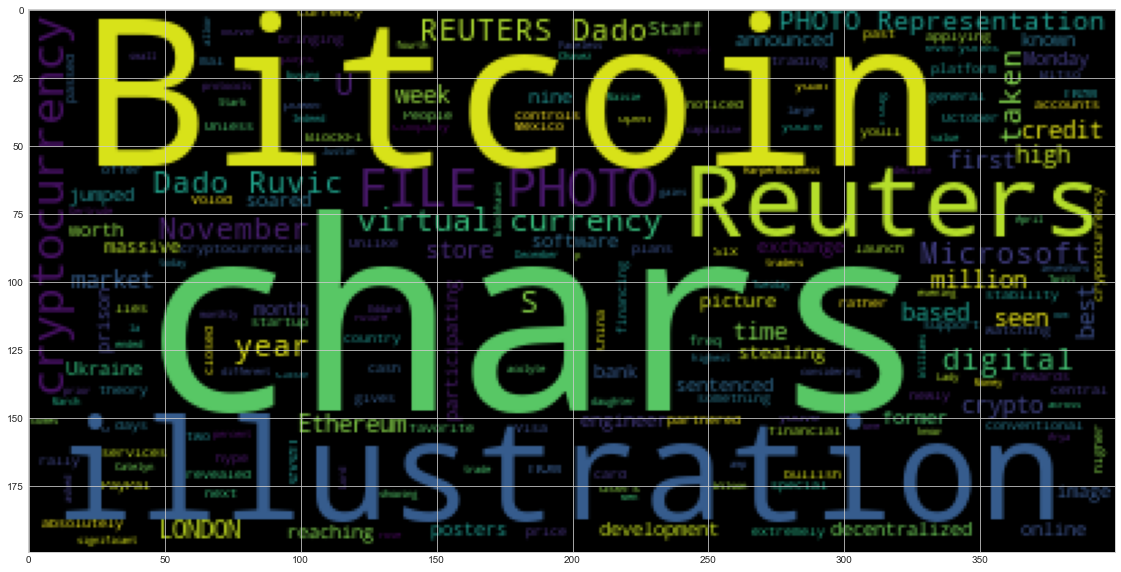

In [28]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bitcoin_df.text.str.cat())
plt.imshow(wc)

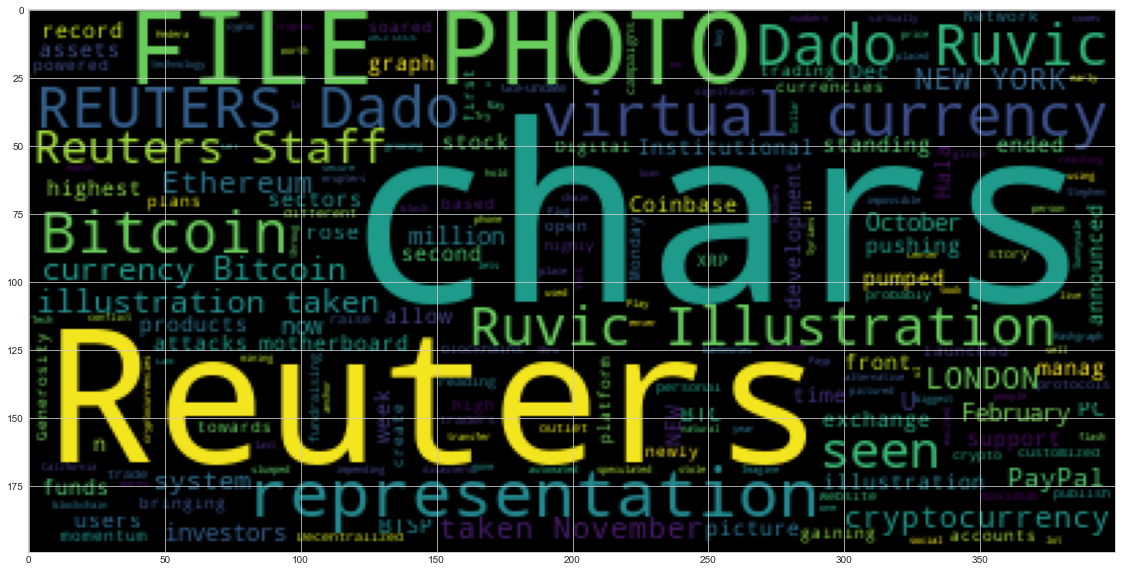

In [51]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ethereum_df.text.str.cat())
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [30]:
import spacy
from spacy import displacy

In [31]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [32]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [33]:
# Concatenate all of the bitcoin text together
bitcoin_cat =bitcoin_df.text.str.cat()

In [43]:
# Run the NER processor on all of the text
doc=nlp(bitcoin_cat)
doc
# Add a title to the document
doc.user_data["title"]="Bitcoin NER"
doc.user_data

{'title': 'Bitcoin NER'}

In [46]:
# Render the visualization
displacy.render(doc,jupyter=True, style="ent")

In [48]:
# List all Entities
for entity in doc.ents:
    print (entity.text,entity.label_)


Microsoft ORG
Ukraine GPE
nine years DATE
more than $10 million MONEY
Microsoft ORG
2016 to 2018 DATE
first ORDINAL
Bitcoin GPE
US GPE
first ORDINAL
US GPE
October DATE
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
digital yuan ORG
the People’s Bank of China ORG
the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
Mexico GPE
$62 million MONEY
chars]4 CARDINAL
U.S. GPE
November DATE
today DATE
500 CARDINAL
10.8 percent PERCENT
November DATE
monthly DATE
April DATE
fourth ORDINAL
Williams PERSON
Arya Stark PERSON
Lady Catelyn PERSON
Eddard PERSON
acolyte PERSON
the Faceless Men WORK_OF_ART
Monday DATE
chars]1 CARDINAL
1 CARDINAL
Microsoft ORG
Ukraine GPE
nine years DATE
more than $10 million MONEY
Microsoft ORG
chars]8 CARDINAL
7 CARDINAL
Bitcoin GPE
above $18,000 MONEY
Tuesday DATE
evening TIME
December 2017 DATE
this week DATE
more than $18,000 MONEY
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Tom Wilson PERSON
Justin H

---

## Ethereum NER

In [52]:
# Concatenate all of the ethereum text together
ethereum_cat =ethereum_df.text.str.cat()

In [54]:
# Run the NER processor on all of the text
docs=nlp(ethereum_cat)
docs 

# Add a title to the document
docs.user_data["title"]="Ethereum NER"
docs.user_data

{'title': 'Ethereum NER'}

In [56]:
# Render the visualization
displacy.render(docs,jupyter=True, style="ent")

In [57]:
# List all Entities
for entity in docs.ents:
    print (entity.text,entity.label_)

PayPal PRODUCT
US GPE
first ORDINAL
US GPE
October DATE
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
XRP ORG
Monday DATE
YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
the Generosity Network ORG
20,000 MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
chars]The New York Times ORG
Coinbase ORG
early February this year DATE
last month DATE
October DATE
$24 million MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
U.S. GPE
May 26, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
LONDON GPE
Reuters ORG
Bitcoin GPE
Hedera ORG
Syrians NORP
Hala Systems ORG
Paypal PERSON